In [1]:
print("hellowur")

hellowur


In [2]:
#Now the commit has been done and it's time for me to add these in the github to check the commits

In [3]:
#importing the library
import pandas as pd
import os
import numpy as np

In [4]:
datasetoriginal= pd.read_csv(r'C:\Users\regan\Hospital Readmissions\Diabetic_Dataset.csv')
dataset= pd.read_csv(r'C:\Users\regan\Hospital Readmissions\Diabetic_Dataset.csv')


In [5]:
#Finding the number of rows and columns for the dataset
print(dataset.shape)

(101766, 50)


In [6]:
print(dataset.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [7]:
print(dataset["weight"].isnull().count()) 
#Here we see all the datas in the weight column are empty so we should drop it as we don't have exact values for it
#Similarly
print(dataset["payer_code"].isnull().count())
print(dataset["medical_specialty"].value_counts().get("?"))

#There are no datas for payer code and lots of missing data for medical specialty so we will drop these columns



101766
101766
49949


In [8]:
new_dataset = dataset.drop(["weight","payer_code","medical_specialty"], axis= 1)
print(new_dataset.shape)
print(new_dataset.isnull().sum().sort_values(ascending=False))

(101766, 47)
max_glu_serum               96420
A1Cresult                   84748
encounter_id                    0
glimepiride                     0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton                     0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
acetohexamide                   0
nateglinide                     0
chlorpropamide                  0
patient_nbr                     0
race                            0
gender                          0
a

In [9]:
#We see 3 columns have been dropped now
new_dataset=new_dataset.replace('?', np.nan)
print(new_dataset["race"].unique())
#We can see there is a '?' missing value on the race column

['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


In [10]:
#We can replace it by mode
#new_dataset=new_dataset.replace(np.nan, new_dataset['race'].mode()[0])
#print(new_dataset.head(50))

In [11]:
print(new_dataset['gender'].unique())

['Female' 'Male' 'Unknown/Invalid']


In [12]:
#there are invalid genders as well so we will find the % of invalid data in the given columns
invalid_gen=len(new_dataset[new_dataset['gender']=="Unknown/Invalid"])
print(invalid_gen)
#we see there are only 3 datas that are invalid we can drop them to clean the data 

3


In [13]:
#dropping datas with invalid/unknown gender
new_dataset = new_dataset[new_dataset['gender'].isin(['Male', 'Female'])]
print(new_dataset.head(20))
print(new_dataset.shape)


    encounter_id  patient_nbr             race  gender       age  \
0        2278392      8222157        Caucasian  Female    [0-10)   
1         149190     55629189        Caucasian  Female   [10-20)   
2          64410     86047875  AfricanAmerican  Female   [20-30)   
3         500364     82442376        Caucasian    Male   [30-40)   
4          16680     42519267        Caucasian    Male   [40-50)   
5          35754     82637451        Caucasian    Male   [50-60)   
6          55842     84259809        Caucasian    Male   [60-70)   
7          63768    114882984        Caucasian    Male   [70-80)   
8          12522     48330783        Caucasian  Female   [80-90)   
9          15738     63555939        Caucasian  Female  [90-100)   
10         28236     89869032  AfricanAmerican  Female   [40-50)   
11         36900     77391171  AfricanAmerican    Male   [60-70)   
12         40926     85504905        Caucasian  Female   [40-50)   
13         42570     77586282        Caucasian  

In [14]:
#we have removed the three rows which contained invalid genders
#we see that there are age given in [0-10) format. I think it's better to find the middle data for the given age bins)

# Extract the two numbers (lower and upper bound) from the age interval
#bounds = new_dataset['age'].str.extract(r'(\d+)-(\d+)').astype(int)

#Calculate midpoint
#new_dataset['age_mid'] = bounds.mean(axis=1) - 0.5
#print(new_dataset)


In [15]:
def age_to_numeric(age):
    if pd.isna(age) or age=="?" or age=="Unknown":
        return np.nan
    numbers = age.strip("[]()").split("-")
    if len(numbers) == 2:
        lower = float(numbers[0])
        upper = float(numbers[1])
        return (upper+lower-1)/2
    return np.nan

new_dataset['middle_age']= new_dataset['age'].apply(age_to_numeric)
print(new_dataset)
        
        


        encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    

In [16]:
#using ordinal encoder to enncode the readmitted data
import sklearn
from sklearn.preprocessing import OrdinalEncoder
#imported the sklearn and OrdinalEncoder 
encoder= OrdinalEncoder()
#instanciated the class 
new_dataset["newencodedcolumn"]=encoder.fit_transform(new_dataset[["readmitted"]])
print(new_dataset["newencodedcolumn"].head(20))
#this is not recommended as it throws errors as 3 numbers but we only need 2 0 or 1 


0     2.0
1     1.0
2     2.0
3     2.0
4     2.0
5     1.0
6     2.0
7     1.0
8     2.0
9     2.0
10    1.0
11    0.0
12    0.0
13    2.0
14    1.0
15    2.0
16    0.0
17    2.0
18    1.0
19    2.0
Name: newencodedcolumn, dtype: float64


In [17]:
print(new_dataset['admission_type_id'].unique()) 
#all datas are constant no need to change anything

[6 1 2 3 4 5 8 7]


In [18]:
print(new_dataset['discharge_disposition_id'].dtype)

int64


In [19]:
#Now we gotta set the target variable for column readmitted
admitted = new_dataset['readmitted']
#print(admitted)
encoded_list = []
for i in admitted:
    if i == '>30' or i == 'No':
        a = 0
    else:
        a = 1
    encoded_list.append(a) # <<< Runs on every iteration

    
new_dataset['encoded_readmitted'] = encoded_list
    # ... rest of code...
#We've set an encoding if data is >30 and not admitted we dont have a problem and is encoded by 0
#if they come <30 days its encoded as 1

In [20]:
new_dataset.head(20)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,middle_age,newencodedcolumn,encoded_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,NO,4.5,2.0,1
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,Ch,Yes,>30,14.5,1.0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,Yes,NO,24.5,2.0,1
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,Ch,Yes,NO,34.5,2.0,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,Ch,Yes,NO,44.5,2.0,1
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,No,Yes,>30,54.5,1.0,0
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,No,No,No,Ch,Yes,NO,64.5,2.0,1
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,No,Yes,>30,74.5,1.0,0
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,No,No,No,Ch,Yes,NO,84.5,2.0,1
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,No,No,No,Ch,Yes,NO,94.5,2.0,1


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
print(new_dataset.head(20))

    encounter_id  patient_nbr             race  gender       age  \
0        2278392      8222157        Caucasian  Female    [0-10)   
1         149190     55629189        Caucasian  Female   [10-20)   
2          64410     86047875  AfricanAmerican  Female   [20-30)   
3         500364     82442376        Caucasian    Male   [30-40)   
4          16680     42519267        Caucasian    Male   [40-50)   
5          35754     82637451        Caucasian    Male   [50-60)   
6          55842     84259809        Caucasian    Male   [60-70)   
7          63768    114882984        Caucasian    Male   [70-80)   
8          12522     48330783        Caucasian  Female   [80-90)   
9          15738     63555939        Caucasian  Female  [90-100)   
10         28236     89869032  AfricanAmerican  Female   [40-50)   
11         36900     77391171  AfricanAmerican    Male   [60-70)   
12         40926     85504905        Caucasian  Female   [40-50)   
13         42570     77586282        Caucasian  

In [23]:
new_dataset.drop(["newencodedcolumn"], axis = 1)
new_dataset["discharge_disposition_id"].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [24]:
#expired id = 20, 40, 41 ,42
#we can drop the readmitted value with id 11,19,20 21 as their mapping is dead and dead patients cannot be readmitted
#new_dataset[~new_dataset["discharge_disposition_id"].isin([11,19,20,21])]
#OR WE CAN DROP IT BY 
index_of_dead_patients = new_dataset[new_dataset["discharge_disposition_id"].isin([11,19,20,21])].index
new_dataset = new_dataset.drop(index_of_dead_patients, axis =0)
print(new_dataset)
#The patients with those IDs are now dropped

        encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    

In [25]:
import matplotlib.pyplot as plt 

<Axes: >

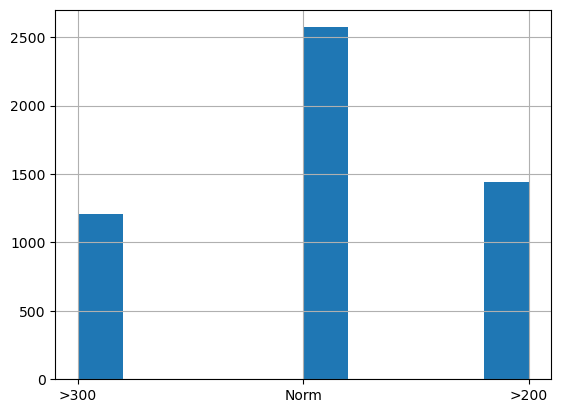

In [26]:
new_dataset["max_glu_serum"].hist()

In [27]:
columns_list= new_dataset.select_dtypes(include=['object']).columns
print(columns_list)
#by doing this we drop most of the integer or number based columns
cols_to_drop = []
for cols in columns_list:
    dominance = new_dataset[cols].value_counts(normalize=True).iloc[0]
#iloc gathers the highest data in each column as the data is sorted highest to lowest first like True = 100000 and False = 1000 
#so we want the highest value for this
    if dominance > 0.95:
        print(f"DROP {cols}: {dominance:.4%} are the same value")
        cols_to_drop.append(cols)
#we added the columns we need to drop here
print(cols_to_drop)


Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
DROP repaglinide: 98.4747% are the same value
DROP nateglinide: 99.3058% are the same value
DROP chlorpropamide: 99.9151% are the same value
DROP acetohexamide: 99.9990% are the same value
DROP tolbutamide: 99.9790% are the same value
DROP acarbose: 99.6933% are the same value
DROP miglitol: 99.9620% are the same value
DROP troglitazone: 99.9970% are the same value
DROP tolazamide: 99.9610% are the same value

In [28]:
#we want to drop the given columns in the table so
######new_dataset.drop(columns=cols_to_drop, inplace=True)
print(new_dataset.columns)
new_dataset.shape
#We've dropped some columns which has no variance


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'middle_age', 'newencodedcolumn', 'encoded_readmitted'],
      dtype='object')


(100111, 50)

In [29]:
#new_dataset.to_csv('Dataset1.csv')
new_dataset["race"]

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 100111, dtype: object

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
#this gives us the array value so converting into dataframe
encoded_gender = pd.DataFrame(encoder.fit_transform(new_dataset["gender"]))
new_dataset["encoded_gender"] = encoded_gender
new_dataset.head(20)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,middle_age,newencodedcolumn,encoded_readmitted,encoded_gender
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,NO,4.5,2.0,1,0.0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,Ch,Yes,>30,14.5,1.0,0,0.0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,Yes,NO,24.5,2.0,1,0.0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,Ch,Yes,NO,34.5,2.0,1,1.0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,Ch,Yes,NO,44.5,2.0,1,1.0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,Yes,>30,54.5,1.0,0,1.0
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,No,No,Ch,Yes,NO,64.5,2.0,1,1.0
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,Yes,>30,74.5,1.0,0,1.0
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,No,No,Ch,Yes,NO,84.5,2.0,1,0.0
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,No,No,Ch,Yes,NO,94.5,2.0,1,0.0


In [32]:

#to convert these into a heirarichal data encoding first let us define the order for the ordinal encoding

#order=[[np.nan,"Norm", ">200",">300"]]
#print(order)
#from sklearn.preprocessing import OrdinalEncoder

#odencoder= OrdinalEncoder(categories=order)

#odencoder.fit_transform(new_dataset[["max_glu_serum"]])
####We have a problem for this encoding as the np.nan value takes the last position of the list which we don't want
mapping={
    "Norm":1,
    ">200": 2,
    ">300": 3,
}
new_dataset["max_glu_serum_encoded"] = new_dataset["max_glu_serum"].map(mapping).fillna(0)
#Lets check
new_dataset["max_glu_serum_encoded"].iloc[120:150]
#working fine




# 2. Define the exact mapping (Ensure no extra spaces!)
a1c_map = {
    "Norm": 1,
    ">7": 2,
    ">8": 3
}

# 3. Apply the map
# (Any value NOT in the list, like 'None' or typos, becomes NaN)
new_dataset["A1Cresult_encoded"] = new_dataset["A1Cresult"].map(a1c_map).fillna(0)

new_dataset["A1Cresult_encoded"].unique()


array([0., 2., 3., 1.])

In [33]:
new_dataset["encoded_gender"].unique()
new_dataset["race"].unique()


array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [34]:
#Category	ICD-9 Range	Example Diseases
#Circulatory	390-459	Heart disease, hypertension, stroke
#Diabetes	250.xx	All diabetes codes (250.00-250.99)
#Respiratory	460-519	Pneumonia, COPD, asthma
#Digestive	520-579	Stomach ulcers, liver disease, appendicitis
#Genitourinary	580-629	Kidney disease, UTI, prostate issues
#Musculoskeletal	710-739	Arthritis, back pain, fractures
#Neoplasms	140-239	Cancers, tumors
#Injury	800-999	Fractures, burns, poisonings
#Other	Everything else	Mental health, skin diseases, etc.

def diagnosis_encoder(id):
    
    string_ids= str(id).strip()
    #encoding diabetes
    if string_ids.startswith('250'):
        return "Diabetes"
    elif string_ids.startswith(('V','E')):
        return "Other"
    else:
        pass
    
    id_numeric= float(string_ids)
    
    if 390 <= id_numeric <= 459:
        return "Circulatory"
    elif 460 <= id_numeric <= 519:
        return "Respiratory"
    elif 520 <= id_numeric <= 579:
        return "Digestive"
    elif 580 <= id_numeric <= 629:
        return "Genitourinary"
    elif 290 <= id_numeric <= 319:
        return "Mental"
    elif 710 <= id_numeric <= 739:
        return "Musculoskeletal"
    elif 140 <= id_numeric <= 239:
        return "Cancers and Tumors"
    elif 800 <= id_numeric <= 999:
        return "Injury and Poisoning"
    elif 1 <= id_numeric <= 139:
        return "Infectious and Parasitic Diseases"
    else:
        return "Other Non-Identified"
    
new_dataset["diag_1_grouped"]=new_dataset["diag_1"].apply(diagnosis_encoder)
new_dataset["diag_2_grouped"]=new_dataset["diag_2"].apply(diagnosis_encoder)
new_dataset["diag_3_grouped"]=new_dataset["diag_2"].apply(diagnosis_encoder)

In [35]:
new_dataset.iloc[:, -10:].head(5)
new_dataset.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,readmitted,middle_age,newencodedcolumn,encoded_readmitted,encoded_gender,max_glu_serum_encoded,A1Cresult_encoded,diag_1_grouped,diag_2_grouped,diag_3_grouped
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,NO,4.5,2.0,1,0.0,0.0,0.0,Diabetes,Other Non-Identified,Other Non-Identified
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,>30,14.5,1.0,0,0.0,0.0,0.0,Other Non-Identified,Diabetes,Diabetes
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,NO,24.5,2.0,1,0.0,0.0,0.0,Other Non-Identified,Diabetes,Diabetes
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,NO,34.5,2.0,1,1.0,0.0,0.0,Infectious and Parasitic Diseases,Diabetes,Diabetes
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,NO,44.5,2.0,1,1.0,0.0,0.0,Cancers and Tumors,Cancers and Tumors,Cancers and Tumors


In [37]:
#Now we encode these values using OHE 
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
cols_to_encode = ["race","diag_1_grouped", "diag_2_grouped", "diag_3_grouped"]
# 1. Setup the encoder
ohe = OneHotEncoder(sparse_output=False, drop='first') # Important: sparse=False gives you a standard array

# 2. Fit and Transform
transformation = ohe.fit_transform(new_dataset[cols_to_encode])
changed_df=pd.DataFrame(transformation)

print(changed_df)



         0    1    2    3    4    5    6    7    8    9   ...   28   29   30  \
0       0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
4       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
100106  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
100107  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
100108  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  1.0   
100109  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
100110  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   

         31   32   33   34   35   36   

In [39]:
#important feature
cols_to_encode = ["race","diag_1_grouped", "diag_2_grouped", "diag_3_grouped"]
feature_names = ohe.get_feature_names_out(cols_to_encode)
changed_df.columns = feature_names

#matching the index as in datasets they may have 0 2 3 5 skipped rows and they must be aligned before concat
# This ensures the new rows match the old rows perfectly.
changed_df.index = new_dataset.index

new_dataset = pd.concat([new_dataset, changed_df], axis=1)
new_dataset.drop(columns=cols_to_encode,axis=1)
new_dataset.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'middle_age', 'newencodedcolumn', 'encoded_readmitted',
       'encoded_gender', 'max_glu_serum_encoded', 'A1Cresult_encoded',
       'di

In [40]:
new_dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_3_grouped_Diabetes,diag_3_grouped_Digestive,diag_3_grouped_Genitourinary,diag_3_grouped_Infectious and Parasitic Diseases,diag_3_grouped_Injury and Poisoning,diag_3_grouped_Mental,diag_3_grouped_Musculoskeletal,diag_3_grouped_Other,diag_3_grouped_Other Non-Identified,diag_3_grouped_Respiratory
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:

#cleaning 
# 1. Remove the "duplicate" columns (ending in .1, .2, etc.)
# This keeps the original 'diag_1_grouped_Diabetes' and deletes the copies
cols_to_drop = [col for col in new_dataset.columns if col.endswith('.1') or col.endswith('.2')]
new_dataset.drop(columns=cols_to_drop, inplace=True)

# 2. Remove the original text columns (OHE replaced these)
text_cols = ['diag_1_grouped', 'diag_2_grouped', 'diag_3_grouped']
# Only drop if they exist to avoid errors
new_dataset.drop(columns=[c for c in text_cols if c in new_dataset.columns], inplace=True)

# 3. Remove the artifact index column
if 'Unnamed: 0' in new_dataset.columns:
    new_dataset.drop(columns=['Unnamed: 0'], inplace=True)

# Final Check: You should see NO columns with .1 or .2, and NO text diagnosis columns
print(new_dataset.columns.tolist())
# 1. Remove Duplicate Columns (Fixes the "Run 3 times" error)
# This command keeps only the FIRST appearance of every column and drops the copies.
new_dataset = new_dataset.loc[:, ~new_dataset.columns.duplicated()]

# 2. Define the list of "Old" text columns to delete
# We drop these because you now have the numeric/encoded versions.
columns_to_drop = [
    'diag_1', 'diag_2', 'diag_3',          # You have the 'grouped_Diabetes' etc. now
    'max_glu_serum', 'A1Cresult',          # You have the '_encoded' versions
    'gender', 'readmitted',                # You have the '_encoded' versions                            
    'encounter_id', 'patient_nbr','gender'          # IDs are not useful for prediction
]

# 3. Drop them (using errors='ignore' so it won't crash if you already dropped them)
new_dataset.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# 4. Final Check

new_dataset.drop(columns=['newencodedcolumn'], errors='ignore', inplace=True)


['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'middle_age', 'newencodedcolumn', 'encoded_readmitted', 'encoded_gender', 'max_glu_serum_encoded', 'A1Cresult_encoded', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_nan', 'diag_1_grouped_Circulatory', 'd

In [42]:
print(new_dataset.select_dtypes(include=['object']).columns)

Index(['race', 'age', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


In [43]:
selected_columns =new_dataset.loc[:,"metformin":"diabetesMed"].columns

In [44]:
print(selected_columns)

Index(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


In [45]:
#dropping some more columns with low variance
new_dataset.drop(columns=["metformin-pioglitazone","metformin-rosiglitazone","citoglipton","examide","troglitazone","acetohexamide", "troglitazone","age"], inplace=True)

new_selected_column= new_dataset.loc[:,"metformin":"diabetesMed"].columns

In [46]:
mapping={
        "No": 0,
    "Down": 1,
    "Yes": 1,
    "Ch": 1,
    "Steady": 2,
    "Up": 3
    }
for cols in new_selected_column:
    new_dataset[cols].replace(mapping,inplace=True)
    

In [47]:
new_dataset["insulin"]
#the encoding is working properly

0         0
1         3
2         0
3         3
4         2
         ..
101761    1
101762    2
101763    1
101764    3
101765    0
Name: insulin, Length: 100111, dtype: int64

In [48]:
new_dataset.columns

Index(['race', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'change', 'diabetesMed', 'middle_age',
       'encoded_readmitted', 'encoded_gender', 'max_glu_serum_encoded',
       'A1Cresult_encoded', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'race_nan', 'diag_1_grouped_Circulatory',
       'diag_1_grouped_Diabetes', 'diag_1_grouped_Digestive',
       'diag_1_grouped_Genitourinary',
       'diag_1_grouped_Infectious and Parasitic Diseases',
       'diag_

In [50]:
new_dataset = new_dataset.iloc[:, 1:]

In [51]:
#Splitting the data into test data and train dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#we will now remove the target_encoded and place it somewhere as it is the target variable

x= new_dataset.drop(columns=["encoded_readmitted"])
y= new_dataset['encoded_readmitted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

cols_to_scale=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses','middle_age']

#lets initialize the scaler

scaler= StandardScaler()

#fit on train
x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])
#transform on both
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])
print(x_train[cols_to_scale].head())
if "Unnamed: 0" in x_train.columns:
    x_train.drop(columns=["Unnamed: 0"], inplace=True)
    x_test.drop(columns=["Unnamed: 0"], inplace=True)

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
55522          3.227674            1.278963        0.986665         5.317452   
84610          0.539380            1.482993       -0.192413         0.620161   
21321          1.883527           -0.149251       -0.781952        -0.492356   
89641         -1.140804           -0.251267       -0.781952         0.002096   
68583         -0.804767            0.411833       -0.781952        -0.245130   

       number_outpatient  number_emergency  number_inpatient  \
55522          -0.293047         -0.209383         -0.499725   
84610          -0.293047         -0.209383         -0.499725   
21321          -0.293047         -0.209383          0.292617   
89641           0.509057          1.892793          0.292617   
68583          -0.293047         -0.209383          0.292617   

       number_diagnoses  middle_age  
55522          0.820820   -0.051043  
84610          0.820820   -2.558958  
21321          0.303

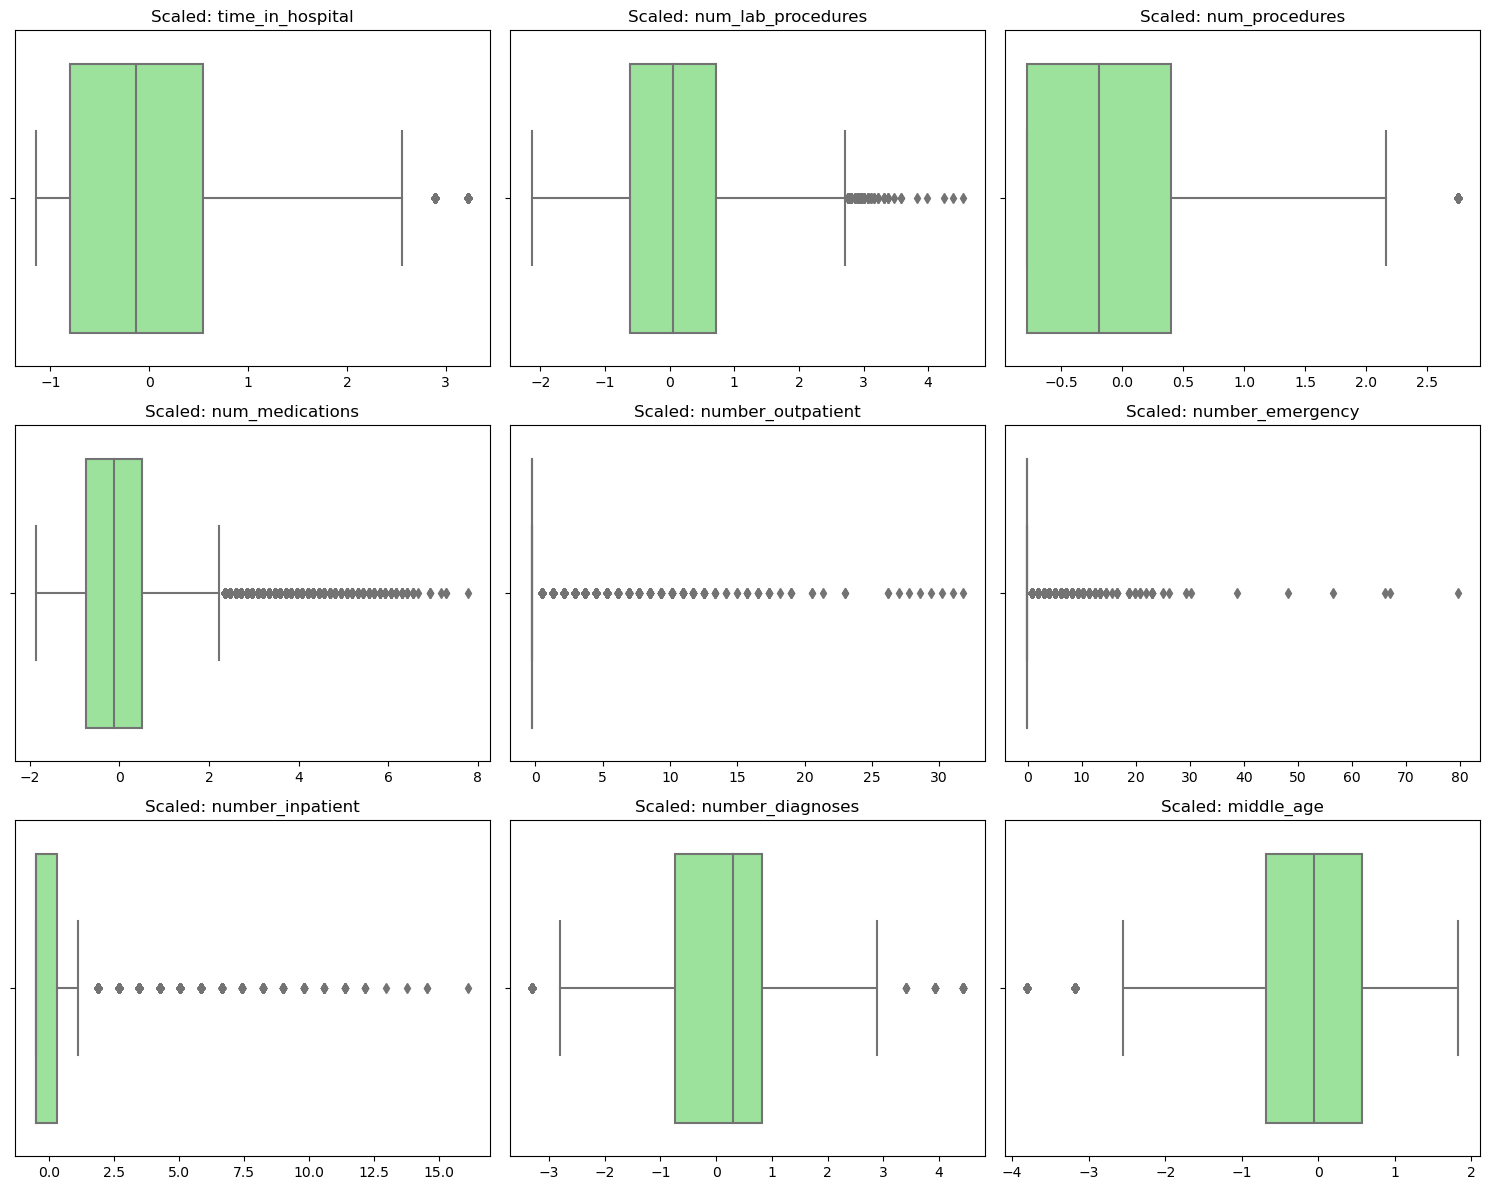

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Use the SAME list of columns you scaled
# (Based on your previous code, 'age' might not have been in 'cols_to_scale', 
# so we stick to the ones we know are scaled)
cols_to_scale = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                 'num_medications', 'number_outpatient', 'number_emergency', 
                 'number_inpatient', 'number_diagnoses','middle_age']

# 2. Setup the figure
plt.figure(figsize=(15, 12))

# 3. Loop through x_train (which now contains the SCALED values)
for i, col in enumerate(cols_to_scale, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=x_train[col], color='lightgreen') # Green to distinguish from the blue unscaled ones
    plt.title(f'Scaled: {col}', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.show()


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train
print("Training Random Forest (This might take a minute)...")
rf_model.fit(x_train, y_train)

# 3. Predict
y_pred_rf = rf_model.predict(x_test)

# 4. Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Training Random Forest (This might take a minute)...
Random Forest Accuracy: 0.6493033012036158

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.22      0.30      7122
           1       0.67      0.89      0.77     12901

    accuracy                           0.65     20023
   macro avg       0.59      0.55      0.54     20023
weighted avg       0.62      0.65      0.60     20023



In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize
# max_depth=10 helps prevent the tree from memorizing noise (Overfitting)
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# 2. Train
print("Training Decision Tree...")
dt_model.fit(x_train, y_train)

# 3. Predict
y_pred_dt = dt_model.predict(x_test)

# 4. Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Training Decision Tree...
Decision Tree Accuracy: 0.6439594466363682

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.18      0.26      7122
           1       0.66      0.90      0.77     12901

    accuracy                           0.64     20023
   macro avg       0.58      0.54      0.51     20023
weighted avg       0.61      0.64      0.59     20023



In [58]:
!pip install xgboost


                                              0.0/72.0 MB ? eta -:--:--
                                              0.1/72.0 MB 1.7 MB/s eta 0:00:44
                                              0.2/72.0 MB 2.1 MB/s eta 0:00:35
                                              0.3/72.0 MB 2.5 MB/s eta 0:00:30
                                              0.5/72.0 MB 2.9 MB/s eta 0:00:25
                                              0.9/72.0 MB 4.1 MB/s eta 0:00:18
                                              1.5/72.0 MB 5.2 MB/s eta 0:00:14
     -                                        2.0/72.0 MB 6.1 MB/s eta 0:00:12
     -                                        2.5/72.0 MB 7.1 MB/s eta 0:00:10
     -                                        3.1/72.0 MB 7.6 MB/s eta 0:00:10
     --                                       3.6/72.0 MB 8.0 MB/s eta 0:00:09
     --                                       4.2/72.0 MB 8.4 MB/s eta 0:00:09
     --                                       4.7/72.0 MB 8

In [59]:
from xgboost import XGBClassifier

# 1. Initialize
# use_label_encoder=False and eval_metric='logloss' prevents warnings
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Train
print("Training XGBoost...")
xgb_model.fit(x_train, y_train)

# 3. Predict
y_pred_xgb = xgb_model.predict(x_test)

# 4. Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Training XGBoost...


C:\Users\regan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:08:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.6545972132048145

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.25      0.34      7122
           1       0.68      0.88      0.77     12901

    accuracy                           0.65     20023
   macro avg       0.61      0.56      0.55     20023
weighted avg       0.63      0.65      0.61     20023



In [64]:
#trying logistic regression for the dataset
from sklearn.linear_model import LogisticRegression 